In [70]:
%load_ext autoreload
%autoreload 2
import os
import torch
import unittest
import time
import pickle
import copy
import numpy as np
from torch import optim
from torch.utils.data import DataLoader
from generic_utils import load_config
from model import FFTNet, FFTNetModel
from dataset import LJSpeechDataset

torch.manual_seed(1)
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
MAX = 100
C = load_config('test_conf.json')
data_path = os.path.join(c.)
with open(f"{C.data_path}dataset_ids.pkl", "rb") as f:
        dataset_ids = pickle.load(f)
dataset = LJSpeechDataset(dataset_ids, 
                          C.data_path, 
                          11, C.min_wav_len, C.max_wav_len, False)
dataloader = DataLoader(dataset, batch_size=1,
                        shuffle=False, collate_fn=dataset.collate_fn,
                        drop_last=True, num_workers=2)

FileNotFoundError: [Errno 2] No such file or directory: '/home/erogol/Data/LJSpeech-1.1/wavsdataset_ids.pkl'

In [45]:
A = 10
c = 0
for data in dataloader:
    wav = data[0]
    mel = data[1]
    leng = data[2]
    target = data[3]
    wav_name = data[4]
    mel_name = data[5]
    c += 1
    print(c)
    if c == A:
        break

1
2
3
4
5
6
7
8
9
10


In [46]:
wav_name

['runs/fftnet/data/quant/LJ014-0061.npy']

In [47]:
mel_name

['runs/fftnet/data/mel/LJ014-0061.npy']

In [65]:
a = np.load('/home/erogol/Projects/WaveRNN/tmp/wavenetrnn/data/quant/LJ014-0061.npy')
a = 2 * a / (2 ** 9 - 1.) - 1.
print(a)

[-0.00195695 -0.00195695 -0.00195695 ... -0.00195695 -0.00195695
 -0.00195695]


In [66]:
a = np.load(wav_name[0])
a = 2 * a / (2 ** 11 - 1.) - 1.
print(a)

[-0.50073278 -0.50073278 -0.50073278 ... -0.50073278 -0.50073278
 -0.50073278]


In [67]:
a.min()

-0.5603321934538349

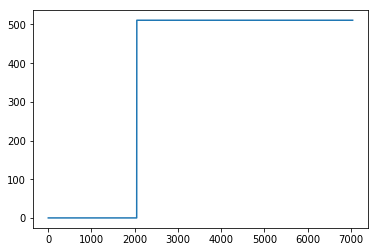

In [34]:
from matplotlib import pylab as plt
plt.plot(np.array(wav[0]))

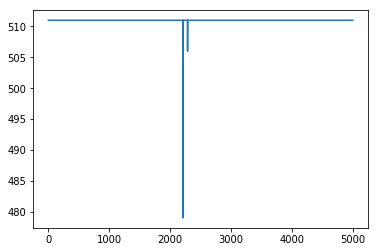

In [27]:
from matplotlib import pylab as plt
plt.plot(np.array(target[0]))

In [14]:
wav = wav.type_as(target)

In [15]:
abs(wav[0, dataset.receptive_field:] - target[0, :-1]).sum()

tensor(0)

In [16]:
wav[0, dataset.receptive_field:] - target[0, :-1]

tensor([0, 0, 0,  ..., 0, 0, 0])

In [17]:
assert abs(wav[0, dataset.receptive_field:] - target[0, :-1]).sum() == 0

In [18]:
from visual import plot_spectrogram
plot_spectrogram(mel[1].numpy(), dataset.ap);

AttributeError: 'LJSpeechDataset' object has no attribute 'ap'